<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/UN_decade_banner.png' align='right' width='100%'/>

<a href="../../../../Index.ipynb"><< Index</a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2024 European Union <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT), Vinca Rosmorduc (CLS)

<html>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://user.eumetsat.int/data/themes/marine"><img src="https://img.shields.io/badge/open-USER PORTAL-154360.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fapplications%2Focean-case-studies/HEAD?labpath=Case_studies%2FUNOD%2FCh06%2FTropical_cyclones_altimetry%2FTropical_cyclones_altimetry.ipynb"><img src="https://mybinder.org/badge_logo.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://jupyterhub.prod.wekeo2.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/ocean-case-studies/Case_studies/UNOD/Ch06/Tropical_cyclones_altimetry/Tropical_cyclones_altimetry.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://code.insula.destine.eu/hub/"><img src="https://img.shields.io/badge/launch-DestinE-f43fd3.svg"></a></div></div>
</html>

<div class="alert alert-block alert-success">
<h3>Ocean case studies</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>

This notebook has the following prerequisites:
- **<a href="https://eoportal.eumetsat.int/" target="_blank">A EUMETSAT Earth Observation Portal account</a>** to download data from the EUMETSAT Data Store
    
There are no prerequisite notebooks for this module, but you may wish to look at the following notebooks on using SRAL and Sentinel-6 data; <br>
- **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-SRAL" target="_blank">Learn SRAL (EUMETSAT Gitlab)</a>**
- **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-S6" target="_blank">Learn S6 (EUMETSAT Gitlab)</a>**

For more contextual information, users should refer to the following case study where the image we generate here is published:
- **<a href="https://user.eumetsat.int/resources/case-studies/tracking-tropical-cyclone-impacts-using-altimetry" target="_blank">Tracking tropical cyclone impacts using altimetry</a>**
    
</div>
<hr>

# Tracking tropical cyclone impacts using altimetry
<font color="#138D75">**UN Ocean Decade Challenge 6: Increase community resilience to ocean hazards**</font>

### Data used

| Dataset | EUMETSAT collection ID | EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|
| SRAL Level 2 Altimetry Global (version BC005) - Sentinel-3 - Reprocessed | EO:EUM:DAT:0834 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:0834" target="_blank">Description</a> | - | - |
| Poseidon-4 Altimetry Level 2 High Resolution - Sentinel-6 | EO:EUM:DAT:0855 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:0855" target="_blank">Description</a> | EO:EUM:DAT:0855 | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3A0855" target="_blank">Description</a>

### Learning outcomes

At the end of this notebook you will know how to;
* download and select a storm track from the National Centers for Environmental Information IBTrACS record
* download SRAL and, optionally, Sentinel-6 level-2 data for a specific storm track and time
* optionally download the EUMETView WMS layer for the Geostationary Ring Convection RGB - Multimission product
* plot the evolving storm track with altimetry derived significant wave height for nearby tracks (including optional bathymetry and convection layers)
* convert the plot series into an animation

### Outline

Tropical cyclones have been responsible for over 700,000 deaths and more than 1,400 billion US dollars worth of damage in the last 50 years (WMO). They are a major use case for meteorological satellite data, and a challenge for weather forecasting. Beyond observation and prediction of tropical cyclones as an atmospheric phenomenon, there is also an ocean component to consider, both in terms of storm formation, and of their impacts. Satellites provide measurements of sea surface temperature, which, along with altimetry measurements can be used to estimate tropical cycle heat potential, a key factor in forecasting cyclones and their intensity. Altimetry data can also be used to measure the ocean response to tropical cyclones, and ultimately its impact on maritime activities and coastal communities through high winds, storm surges, and extreme wave heights. Tropical cyclones also need to be monitored in the context of climate change, which has the potential to alter atmospheric circulations, ocean heat content, and exacerbate the impacts of cyclones through sea level rise. 

This code will replicate the animations from Figure 2 from the **<a href="https://user.eumetsat.int/resources/case-studies/tracking-tropical-cyclone-impacts-using-altimetry" target="_blank">Tracking tropical cyclone impacts using altimetry</a>** case study. We recommend that users of this notebook refer to the case study for more background information on how SWH data from altimetry is incoporated into wave forecast models.

<div class="alert alert-info" role="alert">

## <a id='TOCTOP'></a>Contents

</div>

 1. [Step 1: Setting up our analysis](#section1)
 1. [Step 2 (Optional): Including Gebco bathymetry](#section2)
 1. [Step 3: The Reading IBTrACS hurricane data](#section3)
 1. [Step 4: Acquiring SRAL data from the EUMETSAT Data Store](#section4)
 1. [Step 5 (Optional): Including EUMETView Web Map Service layers](#section5)
 1. [Step 6: Gathering Significant Wave Height data](#section6)
 1. [Step 7: Plotting Significant Wave Height images](#section7)
 1. [Step 8: Generating the animation](#section8)
 1. [Step 9: Playing the animation](#section9)

<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../../../../README.md" target="_blank">README</a>**.

In [1]:
import glob                            # a package that helps with file searching
import os                              # a library that allows us access to basic operating system commands
import eumdac                          # a tool that helps us download via the eumetsat/data-store
import datetime                        # a library that allows us to work with dates and times
import shutil                          # a library that allows us access to basic operating system commands like copy
import cartopy                         # a library that supports mapping and projection
import matplotlib as mpl               # a library the provides plotting capability
import matplotlib.pyplot as plt        # a library the provides plotting capability
import xarray as xr                    # a library that helps us work efficiently with multi-dimensional arrays
import numpy as np                     # a library that lets us work with arrays; we import this with a new name "np"
import pandas                          # a library the support times series management
import cv2                             # a library for making videos
import IPython.display                 # a library that supports playing video
from owslib.wms import WebMapService   # a library that supports interfacing with OGC web services
from owslib.util import Authentication # a library that supports authenticating OGC web services
import requests                        # a library that supports HTTP
from pathlib import Path               # a library to help us to construct system paths
import getpass                         # a library to help us enter passwords
import warnings                        # a library that supports managing warning messages

warnings.filterwarnings("ignore")

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Setting up our analysis
[Back to top](#TOCTOP)

</div>

Before we run the code below we have to define a series of parameters. These control, amongst other things;
* which storm we focus on
* what kind of altimetry data we use, and with what selection criteria
* how we plot the data

Let's start with the former and select our storm in the cell below. We need to provide a storm name corresponding to one named in the IBTrACS record, as well as a year (as some names are used twice!). By default, wind speed is provided in knots, which we will also convert to km/h using the conversion factor given. 

In [2]:
storm_name = "FREDDY"
storm_year = "2023"
knots_to_kmh = 1.852
make_annotations = True

Next, we will select out altimetry data. If we set `download_S3_data` to true, then we will download fresh data around the storm in question. If we set this to false, we will look in the **./products_\<STORM_NAME>** directory for any Sentinel-3 and Sentinel-6 data that we have already downloaded.

If we are downloading fresh data, we need to specify the timeliness of the data we gather (`S3_timeliness`) (NR: near real-time, ST: short time-critical or NT: non time-critical) and how far before and after the storm history we want to pad our altimetry acquisition in days (`day_pad`).

*Note: Sentinel-6 operational data is currently not available through the EUMETSAT Data Store, so in our examples we include it by providing an offline archive taken from the Sentinel-6 sFTP server. This is discussed below. In 2023, this situation will change and Sentinel-6 will be selectable in the same way as Sentinel-3.*

In [3]:
# Altimetry parameters: S3
download_S3_data = True
S3_timeliness = "NT"

# Altimetry parameters: S6
download_S6_data = True
S6_timeliness = "NT"

day_pad = 1

This notebook provides options for plotting bathymetry and WMS layers extracted from EUMETView.

In order to plot bathymetry, you must provide a relevent **<a href="https://www.gebco.net/data_and_products/gridded_bathymetry_data/" target="_blank">GEBCO netCDF bathymetry file</a>**. If you do not have such a file for your region, you should set `bathy_file = None`. Otherwise you should specify your file name.

If you select `plot_WMS = True` the notebook will download the relevant Web Map Service layer from the **<a href="https://view.eumetsat.int/" target="_blank">EUMETView</a>** service. The layer can be specified using the `WMS_layers` argument, and here we select the **<a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:0331" target="_blank">Geostationary Ring Airmass RGB - Multimission</a>** layer by default as this shows a consistent proxy of storm activity during both day and night.

In [4]:
bathy_file = None
plot_WMS = True
WMS_layers = "mumi:wideareacoverage_rgb_airmass"

Next we will chose some paramters for our plotting. Most of these can be left as a default, but you should be aware of the following two;
* `rad_scale`: this scales the storm extent in nautical miles to the pixel size of your plot. This may change if you alter the map projection of adapt the script to high latitudes
* `time_window`: this defines the "in scope" window, in hours, for plotting altimetry tracks. For example, if this is set to [6, 6] then altimetry tracks from 6 hours before the current storm time to 6 hours after the current storm time will show in the plot.

In [5]:
# the minimum and maximum wind speed (in km/h) to plot. Any values above the maximum will be truncated
wind_min = 0
wind_max = 150

# the size of the plot. We advise retaining these numbers.
plot_xy = [32, 12]

# the scaling parameter to map extent in nautical miles to plot pixels. As explained above,
# will change with each map projection.
rad_scale = 2000/60
rad_edgewidth = 10

# the altimetry search window for displaying tracks
time_window = [6, 6]

# the latitude and longitude extent of your plot
plot_extents = [-180, 180, -90, 90]

# any annotations you wish to make on your plot in the form shown in the example below
annots = {}

# get a "land layer" map to use in plotting
land_50m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cartopy.feature.COLORS['land'])

# how often to output an animation panel
panel_frequency = 5

In our case study, we have run this notebook for four cases. If you have selected one of these storms above (NANMADOL, HINNAMOR, FIONA, IAN, FREDDY), then the Notebook will default to using the plot extent, bathymetry and annotations specified below.

*Note: we have renamed out bathymetry files for each case, and you may need to do the same after you have generated and downloaded them.*

In [6]:
# Example cases
if storm_name == "NANMADOL" or storm_name == "HINNAMNOR":
    # plot extents: [W, E, S, N]
    plot_extents = [111, 160, 18, 43]
    # plot annotations
    annots = {"names":["Japan", "South\nKorea", "China"], "xs":[137.0, 127.0, 115.0], "ys":[35.75, 35.75, 31.0]}
elif storm_name == "FIONA" or storm_name == "IAN" or storm_name == "FRANKLIN" or storm_name == "LEE":
    plot_extents = [-90, -6, 0, 43]
    annots = {"names":["N. America", "S. America", "Africa"], "xs":[-87.5, -70, -12.5], "ys":[35, 5, 15]}
elif storm_name == "FREDDY":
    plot_extents = [26, 120, -40, 8]
    annots = {"names":[], "xs":[], "ys":[]}

# set plotting parameters
xoffset = (plot_extents[1] - plot_extents[0])
yoffset = (plot_extents[3] - plot_extents[2])

Now we have specified our parameters, we can start the data acquistion and plotting.

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Including Gebco bathymetry (Optional)
[Back to top](#TOCTOP)

</div>


If you have provided a bathymtry file, it will be read in the cell below. Note that GEBCO bathymetry files are very high-resolution, so we will subset the file using the `bathy_stride` argument to only read in every 3rd point in each dimension.

In [7]:
if bathy_file:
    bathy_stride = 3
    BATHY_vars = xr.open_mfdataset(bathy_file)
    blon = np.array(BATHY_vars.lon)[::bathy_stride]
    blat = np.array(BATHY_vars.lat)[::bathy_stride]
    bathy = np.array(BATHY_vars.elevation)[::bathy_stride, ::bathy_stride]
    BATHY_vars.close()

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Reading IBTrACS hurricane data
[Back to top](#TOCTOP)

</div>

So, lets begin. First up we will download the relevent IBTrACS file. In our case we will fetch the most recent version of the storm archive that spans the last three years. The cell below will retrieve this automatically.

In [8]:
remote_tracks_file = "https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/netcdf/IBTrACS.last3years.v04r00.nc"
local_tracks_file = os.path.join(os.getcwd(), 'IBTrACS.nc')

with requests.get(remote_tracks_file, stream=True) as r:
    with open(local_tracks_file, 'wb') as f:
        shutil.copyfileobj(r.raw, f)

Now we have the file, lets open it and take a look at its contents using *xarray*...

In [9]:
tracks = xr.open_mfdataset(local_tracks_file)
tracks

<xarray.Dataset> Size: 85MB
Dimensions:           (storm: 321, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] 924kB dask.array<chunksize=(321, 360), meta=np.ndarray>
    lat               (storm, date_time) float32 462kB dask.array<chunksize=(321, 360), meta=np.ndarray>
    lon               (storm, date_time) float32 462kB dask.array<chunksize=(321, 360), meta=np.ndarray>
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 1kB dask.array<chunksize=(321,), meta=np.ndarray>
    sid               (storm) |S13 4kB dask.array<chunksize=(321,), meta=np.ndarray>
    season            (storm) float32 1kB dask.array<chunksize=(321,), meta=np.ndarray>
    number            (storm) int16 642B dask.array<chunksize=(321,), meta=np.ndarray>
    basin             (storm, date_time) |S2 231kB dask.array<chunksize=(321, 360), meta=np.ndarray>
    subbasin          (storm, date_time) |S2 231kB dask.array<chunksize=(321, 360), meta=np.ndarray>
    ...                ...
    reunion_gust      (storm, date_time) float32 462kB dask.array<chunksize=(321, 360), meta=np.ndarray>
    reunion_gust_per  (storm, date_time) float32 462kB dask.array<chunksize=(321, 360), meta=np.ndarray>
    usa_seahgt        (storm, date_time) float32 462kB dask.array<chunksize=(321, 360), meta=np.ndarray>
    usa_searad        (storm, date_time, quadrant) float32 2MB dask.array<chunksize=(321, 360, 4), meta=np.ndarray>
    storm_speed       (storm, date_time) float32 462kB dask.array<chunksize=(321, 360), meta=np.ndarray>
    storm_dir         (storm, date_time) float32 462kB dask.array<chunksize=(321, 360), meta=np.ndarray>
Attributes: (12/49)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    history:                    Tue May 28 04:25:59 2024: ncks --no_abc --cnk...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    NCO:                        netCDF Operators version 4.8.1 (Homepage = ht...

We need to find the storm that corresponds to the name and year selection criteria we specified above. In order to do that we will find all instances of our name (**name_ix**) and cross reference with our storm year (**year_ix**).

In [10]:
# find the correct storm for the correct year
name_ix = np.where(np.array(tracks["name"]).astype(str) == storm_name)
storm_dates = np.array(tracks["iso_time"])[name_ix].astype(str)
storm_years = np.array([str(i[0][0:4]) for i in storm_dates])
year_ix = np.where(storm_years == storm_year)[0]

# get relevant coordinates
lon = np.array(tracks["lon"])[name_ix][year_ix]
lat = np.array(tracks["lat"])[name_ix][year_ix]
date = np.array(tracks["iso_time"])[name_ix][year_ix].astype(str)
intensity = np.array(tracks["usa_wind"])[name_ix][year_ix] * knots_to_kmh
radius = np.array(tracks["usa_roci"])[name_ix][year_ix]
tracks.close()

In some cases, when we read in the data we get empty values. We will quickly tidy up our storm record to remove these. 

In [11]:
# strip empties
ii = np.where(date != '')
lon = lon[ii]
lat = lat[ii]
date = date[ii]
intensity = intensity[ii]
radius = radius[ii]

To help us compare the dates from the storm record with those of the altimetry products we will use the *pandas* library to convert the storm dates from their native datetime64 format.

In [12]:
# format data in pandas
storm_dates = pandas.to_datetime(date)

We will also convert our radius values in nautical miles to approximate map pixels using the scale factors we set above. This is an approximation only!

In [13]:
scaled_radius = radius*rad_scale - rad_edgewidth*2

Now lets plot our storm's track...

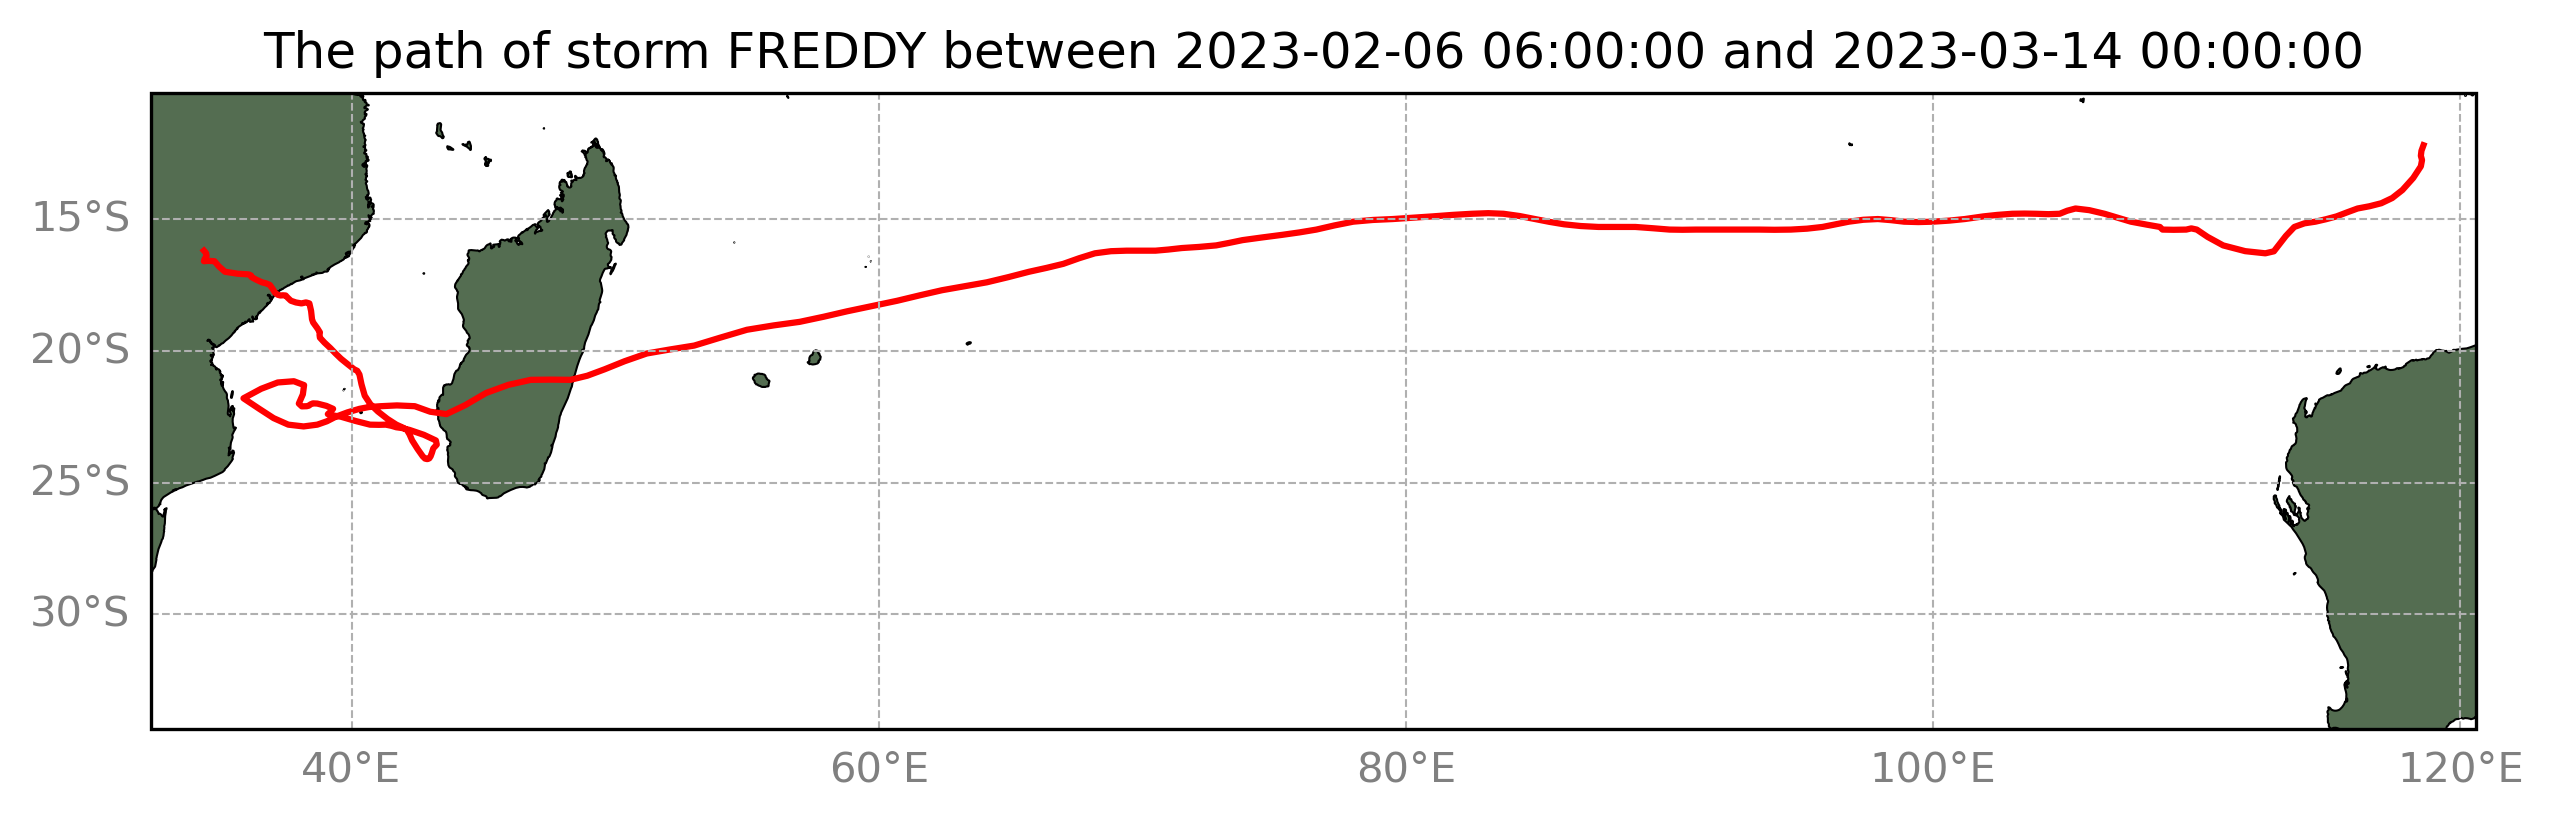

In [14]:
fig, m = plt.subplots(1, 1, figsize=(10, 14), dpi=300, subplot_kw={"projection": cartopy.crs.PlateCarree()})
pad = 2
m.set_extent([min(lon)-pad, max(lon)+pad, min(lat)-pad, max(lat)+pad])
p1, = m.plot(lon, lat, c='r')

# add some map embellishments
m.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='k', facecolor='#546d51', linewidth=0.5));
g1 = m.gridlines(draw_labels = True, linestyle='--', linewidth=0.5, zorder=1000)
g1.top_labels = g1.right_labels = False
g1.xlabel_style = g1.ylabel_style = {'color': '0.5'}
plt.title(f"The path of storm {storm_name} between {storm_dates[0]} and {(storm_dates[-1])}");

Hopefully this looks like the storm we were expecting. In the default demonstration case, we should see the path of Storm Freddy as it crosses the Indian Ocean during the February and March, 2023. Let's take a quick look at the radius and intensity of our storm...

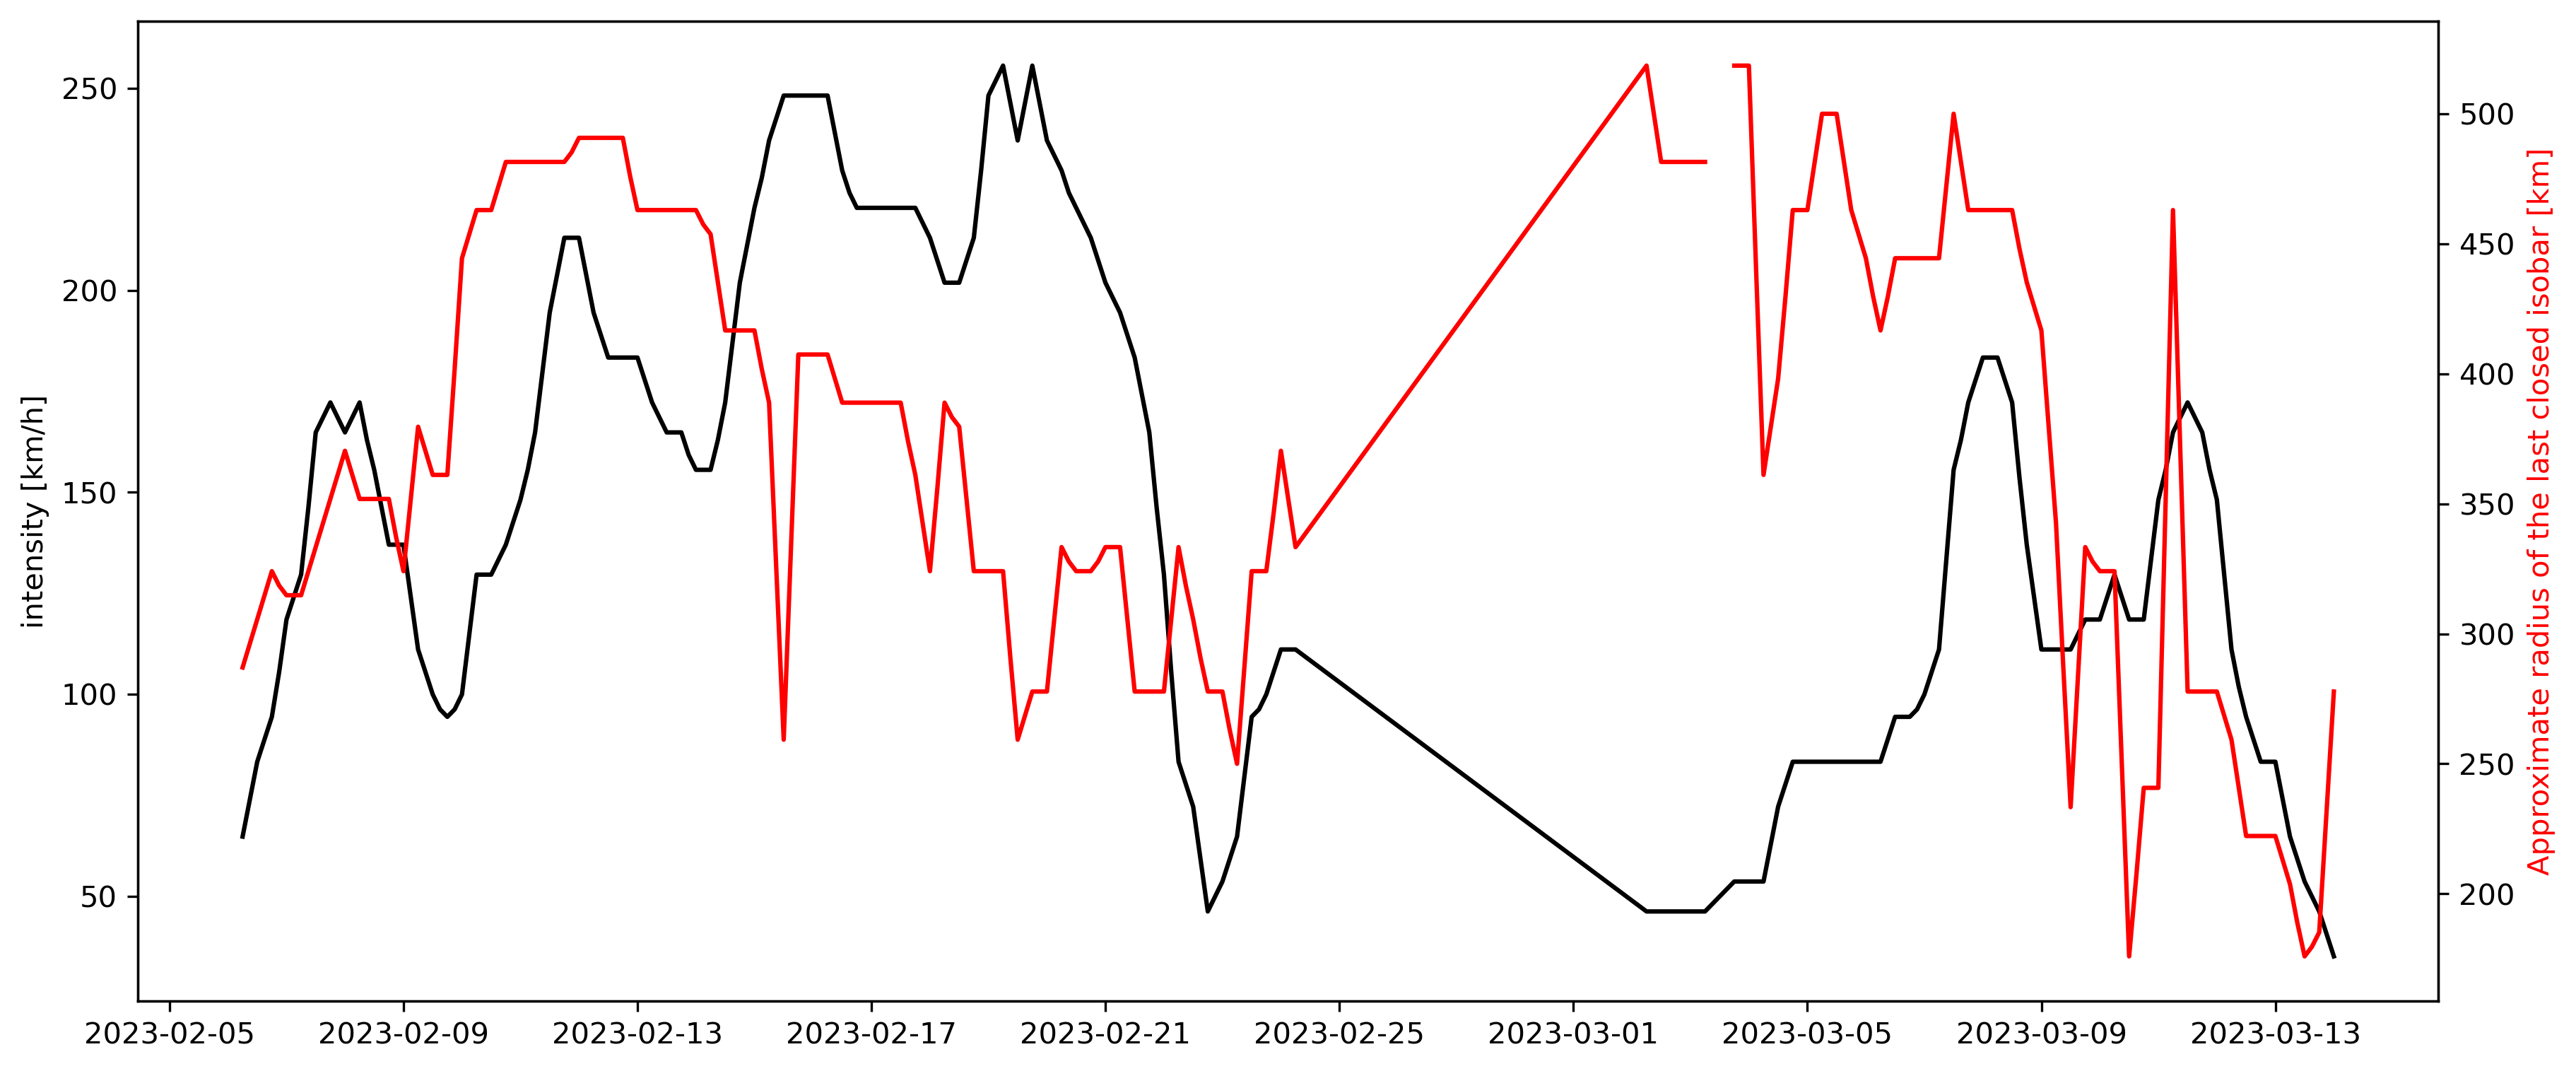

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6), dpi=300)
ax.plot(storm_dates, intensity, 'k')
ax.set_ylabel("intensity [km/h]")
ax2 = ax.twinx()
ax2.plot(storm_dates, radius*knots_to_kmh, 'r')
ax2.set_ylabel("Approximate radius of the last closed isobar [km]", color='r');

For Freddy, We can see the storm grow and intensify as it travels west across the Indian Ocean, losing much of its power as it crosses Madagascar, and then "recharging" as it enters to Mozambique Channel.

Now we need to use what we know about this track to define the spatial and temporal extents of our altimetry search window, as follows...

In [16]:
# set altimetry acquision spatial window: W, E, S, N
north = np.nanmax(lat)
south = np.nanmin(lat)
east = np.nanmax(lon)
west = np.nanmin(lon)

ROI = [[west, south], [west, north], [east, north], [east, south], [west, south]]
polygon = 'POLYGON(({}))'.format(','.join(["{} {}".format(*coord) for coord in ROI]))

start = storm_dates[0] - datetime.timedelta(days=day_pad)
end = storm_dates[-1] + datetime.timedelta(days=day_pad)

<div class="alert alert-info" role="alert">

## <a id='section4'></a>4. Acquiring SRAL data from the EUMETSAT Data Store
[Back to top](#TOCTOP)

</div>

Now that we have isolated our storm of choice, lets download our altimetry data according to its extent. Firstly, we will create a directory for our downloaded data...

In [17]:
# Create a download directory for our SRAL products
download_dir = os.path.join(os.getcwd(), f"products_{storm_name}")
os.makedirs(download_dir, exist_ok=True)

Before we perform our download, lets check the parameters.

In [18]:
# summarise
print(f'Getting swaths from {str(start)} to {str(end)} over region: {str(polygon)}')

Getting swaths from 2023-02-05 06:00:00 to 2023-03-15 00:00:00 over region: POLYGON((34.400001525878906 -24.106050491333008,34.400001525878906 -12.199999809265137,118.5999984741211 -12.199999809265137,118.5999984741211 -24.106050491333008,34.400001525878906 -24.106050491333008))


<div class="alert alert-block alert-success">

### Accessing the EUMETSAT Data Store

To access Copernicus marine data from the <a href="https://data.eumetsat.int " target="_blank">EUMETSAT Data Store</a>, we will use the EUMETSAT Data Access Client (`eumdac`) python package. If you are working with the recommended Anaconda Python distribution and used the environment file included in this repository (environment.yml) to build this python environment (as detailed in the README), you will already have installed this. If not, you can install eumdac using;

`conda install -c eumetsat eumdac`

You can also find the source code on the <a href="https://gitlab.eumetsat.int/eumetlab/data-services/eumdac " target="_blank">EUMETSAT GitLab</a>. Please visit the EUMETSAT user portal for more information on the <a href="https://user.eumetsat.int/data-access/data-store " target="_blank">EUMETSAT Data Store</a> and <a href="https://user.eumetsat.int/resources/user-guides/eumetsat-data-access-client-eumdac-guide " target="_blank">eumdac</a>.

To download data from the EUMETSDAT Data Store via API, you need to provide credentials. To obtain these you should first register at for an <a href="https://eoportal.eumetsat.int/" target="_blank">EUMETSAT Earth Observation Portal account</a>. Once you have an account, you can retrieve your `<your_consumer_key>` and `<your_consumer_secret>` from the <a href="https://api.eumetsat.int/api-key/ " target="_blank">"EUMETSAT Data Store API"</a> page (*Note: you must click the "Show hidden fields" button at the bottom of the page to see the relevant fields*). If you do not already have a local credentials file, you will be prompted to enter your credentials when you run the cell below. This will create the required local credentials file, so that you only need to run this once.

*Note: your key and secret are permanent, so you should take care to never share them*

</div>

In [19]:
# load credentials
eumdac_credentials_file = Path(Path.home() / '.eumdac' / 'credentials')

if os.path.exists(eumdac_credentials_file):
    consumer_key, consumer_secret = Path(eumdac_credentials_file).read_text().split(',')
else:
    # creating authentication file
    consumer_key = input('Enter your consumer key: ')
    consumer_secret = getpass.getpass('Enter your consumer secret: ')
    try:
        os.makedirs(os.path.dirname(eumdac_credentials_file), exist_ok=True)
        with open(eumdac_credentials_file, "w") as f:
            f.write(f'{consumer_key},{consumer_secret}')
    except:
        pass
        
token = eumdac.AccessToken((consumer_key, consumer_secret))
print(f"This token '{token}' expires {token.expiration}")

This token '07b3b1e9-4b17-3579-a309-b6e10fe10771' expires 2025-01-16 09:57:56.205912


Now we have a token, we can create an instance of the EUMETSAT Data Store.

In [20]:
datastore = eumdac.DataStore(token)

Lets select the correct collection from our datastore object. We can find this information via the **<a href="https://data.eumetsat.int/">Data Store GUI</a>** or by asking `eumdac` to tell us about all available SRAL collections as follows:

In [21]:
for collection in datastore.collections:
    if "SRAL" in collection.title and "non-public" not in collection.abstract:
        print(f"{collection}: {collection.title}")

EO:EUM:DAT:0406: SRAL Level 1B - Sentinel-3
EO:EUM:DAT:0413: SRAL Level 1A Unpacked L0 Complex echos - Sentinel-3
EO:EUM:DAT:0415: SRAL Level 2 Altimetry Global - Sentinel-3
EO:EUM:DAT:0414: SRAL Level 1B stack echoes - Sentinel-3
EO:EUM:DAT:0833: SRAL Level 1B (version BC005) - Sentinel-3 - Reprocessed
EO:EUM:DAT:0834: SRAL Level 2 Altimetry Global (version BC005) - Sentinel-3 - Reprocessed
EO:EUM:DAT:0835: SRAL Level 1B Stack Echoes (version BC005) - Sentinel-3 - Reprocessed
EO:EUM:DAT:0836: SRAL Level 1A Unpacked L0 Complex Echoes (version BC005) - Sentinel-3 - Reprocessed
EO:EUM:DAT:0583: SRAL Level 1A Unpacked L0 Complex Echoes (version BC004) - Sentinel-3 - Reprocessed
EO:EUM:DAT:0584: SRAL Level 1B (version BC004) - Sentinel-3 - Reprocessed
EO:EUM:DAT:0585: SRAL Level 1B Stack Echoes (version BC004) - Sentinel-3 - Reprocessed
EO:EUM:DAT:0586: SRAL Level 2 Altimetry Global (version BC004) - Sentinel-3 - Reprocessed


We can now set out collection to the one we want, **EO:EUM:DAT:0834 (SRAL Level 2 Altimetry Global (version BC005) - Sentinel-3 - Reprocessed)**

In [22]:
collectionID_S3 = 'EO:EUM:DAT:0834'

Next we will ask the datastore for our defined collection...

In [23]:
selected_collection = datastore.get_collection(collectionID_S3)

..and then use the temporal and spatial extents from our storm to to define the products that fall within the scope of our search.

In [24]:
# filter the collection for products that match our storm
products = selected_collection.search(dtstart=start, dtend=end, geo=polygon, timeliness=S3_timeliness)
print(f'Found {str(len(products))} products')

Found 449 products


Finally, we will fetch the data. We do not need the full SRAL level-2 product and to save both local space and download time, we will only retrieve the standard measurements. As this next cells proceeds, you should see the files appear in your download directory (**./products_\<STORM_NAME>**).

In [25]:
# download
if download_S3_data:
    for product in products:
        for entry in product.entries:
            if 'standard_measurement' in entry:
                product_dir = os.path.join(download_dir, str(product)) 
                os.makedirs(product_dir, exist_ok=True)
                if os.path.exists(os.path.join(product_dir, os.path.basename(entry))):
                    print(f'Skipping existing file.')
                else:
                    with product.open(entry=entry) as fsrc, open(os.path.join(product_dir, fsrc.name), mode='wb') as fdst:
                        shutil.copyfileobj(fsrc, fdst)
                        print(f'Download of file {os.path.join(os.path.basename(product_dir), fsrc.name)} finished.')

Now lets repeat the process with data from Sentinel-6, starting by selecting the correct collection and finding the matching products

In [26]:
# select the collection
collectionID_S6 = 'EO:EUM:DAT:0855'
selected_collection = datastore.get_collection(collectionID_S6)

# filter the collection for products that match our storm
products = selected_collection.search(dtstart=start, dtend=end, geo=polygon, timeliness=S6_timeliness)
print(f'Found {str(len(products))} products')

Found 217 products


Then lets download the products

In [27]:
# download
if download_S6_data:
    for product in products:
        for entry in product.entries:
            if '_RED_' in entry:
                product_dir = os.path.join(download_dir, str(product)) 
                os.makedirs(product_dir, exist_ok=True)
                if os.path.exists(os.path.join(product_dir, os.path.basename(entry))):
                    print(f'Skipping existing file.')
                else:
                    with product.open(entry=entry) as fsrc, open(os.path.join(product_dir, fsrc.name), mode='wb') as fdst:
                        shutil.copyfileobj(fsrc, fdst)
                        print(f'Download of file {os.path.join(os.path.basename(product_dir), fsrc.name)} finished.')

<div class="alert alert-info" role="alert">

## <a id='section5'></a>5. Including EUMETView Web Map Service layers (Optional)
[Back to top](#TOCTOP)

</div>

If you set `plot_WMS = True` at the top of this Notebook, then the following cell will set the parameters we need to download the relevant layer. The download itself happens in the **[Plotting SWH images](#section5)** section, below.

In [28]:
if plot_WMS:
    service_url = 'https://view.eumetsat.int/geoserver/ows?'
    wms = WebMapService(service_url, auth=Authentication(verify=True))

    # set image parameters
    format_option = 'image/jpeg'
    x_pixels = 2000

    # set coords
    plot_ratio = (plot_extents[1] - plot_extents[0])/ (plot_extents[3] - plot_extents[2])
    lons = np.linspace(plot_extents[0], plot_extents[1], int(x_pixels))
    lats = np.linspace(plot_extents[2], plot_extents[3], int(x_pixels/plot_ratio))
    WMS_LONS, WMS_LATS = np.meshgrid(lons, lats)

<div class="alert alert-info" role="alert">

## <a id='section6'></a>6. Gathering Significant Wave Height data
[Back to top](#TOCTOP)

</div>

Now that all of our altimetry data is downloaded, we need to collect what we have. The cell below will find all of our Sentinel-3 SRAL products.

In [29]:
# find the products
product_dirs_S3 = glob.glob(os.path.join(download_dir, "*.SEN3"))
product_dirs_S6 = glob.glob(os.path.join(download_dir, "*.SEN6"))

We will now loop through these products to find the average acquisition time of each product, using the timestamps in the filename.

In [30]:
# loop through granules to get their average time stamps
granule_dates_S3 = []
for product_dir in product_dirs_S3:
    t_step = datetime.datetime.strptime(os.path.basename(product_dir).split('_')[-14], "%Y%m%dT%H%M%S") \
           - datetime.datetime.strptime(os.path.basename(product_dir).split('_')[-15], "%Y%m%dT%H%M%S")
    granule_dates_S3.append(datetime.datetime.strptime(os.path.basename(product_dir).split('_')[-15], "%Y%m%dT%H%M%S") \
                         + t_step/2)

Lets ingest the Sentinel-6 data in exactly the same way.

In [31]:
# loop through granules to get their average time stamps
granule_dates_S6 = []
for product_dir in product_dirs_S6:
    t_step = datetime.datetime.strptime(os.path.basename(product_dir).split('_')[-11], "%Y%m%dT%H%M%S") \
           - datetime.datetime.strptime(os.path.basename(product_dir).split('_')[-12], "%Y%m%dT%H%M%S")
    granule_dates_S6.append(datetime.datetime.strptime(os.path.basename(product_dir).split('_')[-12], "%Y%m%dT%H%M%S") \
                         + t_step/2)

Finally, lets gather all the Sentinel-3 SRAL and Sentinel-6 products, and their dates, together into a single array.

In [32]:
product_dirs = np.array(product_dirs_S3 + product_dirs_S6)
granule_dates = np.array(granule_dates_S3 + granule_dates_S6)

<div class="alert alert-info" role="alert">

## <a id='section7'></a>7. Plotting Significant Wave Height images
[Back to top](#TOCTOP)

</div>

It has taken us a while to get here, but we are finally ready to launch our plotting script. We will create a series of images that we convert into an animation at the end. Firstly, we will create an output directory for our images...

In [33]:
# Create an output directory for our images products
output_dir = os.path.join(os.getcwd(), f"output_{storm_name}")
os.makedirs(output_dir, exist_ok=True)

And now we are ready to go. The following cell looks very complex, but we can't break it up as it runs in a loop that iterates over the storm times. However, it actually performs only a few simple (if specific) tasks;
* *Step 1: Sets up the figure panel for this iteration, and plots the (optional) bathymetry and our land layer*
* *Step 2: Optionally downloads and plots the specified WMS layer*
* *Step 3: Plots the historical storm track*
* *Step 4: Finds and relevant altimetry tracks that are in scope for this time slice and plots the significant wave height*
* *Step 5: Annotate the plots with our countries of interest*
* *Step 6: Embellish the plot with gridlines etc.*
* *Step 7: Make the colour bars for the storm wind speed (from the IBTrACS record) and significat wave height from the altimetry tracks*
* *Step 8: Close and figure ready for the next iteration*

Each step is marked in the cell. And we will get an update on progress every 5 times steps. 

...so lets go!

In [34]:
# make the animation frames
for storm_date, count in zip(storm_dates, range(len(storm_dates))):

    if np.mod(count, panel_frequency) == 0:
        print(f"Processing data for {storm_date} (panel {str(count).zfill(2)})")
    else:
        continue
        
    # limit to plot region
    if lon[count] < np.nanmin(plot_extents[0]) or lon[count] > np.nanmax(plot_extents[1]) \
      or lat[count] < np.nanmin(plot_extents[2]) or lat[count] > np.nanmax(plot_extents[3]):
        continue

    # Step 1: set up the figure
    fig, [m, m2] = plt.subplots(2, 1, figsize=(plot_xy[0], plot_xy[1]),
                                dpi=150, gridspec_kw={'height_ratios': [14, 1]},
                                subplot_kw={"projection": cartopy.crs.PlateCarree()})
    plt.rcParams.update({'font.size': 20})
    m2.set_visible(False)

    # Bathy
    if bathy_file:
        m.contour(blon, blat, bathy,
            [-4000, -3000, -2000, -1000, -500, -100, 0],
            linewidths=0.5, linestyles='solid', cmap=plt.cm.Blues_r, alpha=0.75, zorder=1)

    # Plot land
    m.add_feature(land_50m, edgecolor='k', facecolor='k', zorder=2)
    
    # Step 2: Plot WMS layers
    if plot_WMS:
        t_format = '%Y-%m-%dT%H:%M:%S.000Z'
        payload = {'service' : 'WMS',
                    'access_token' : token,
                    'request' : 'GetMap',
                    'version' : '1.3.0',
                    'layers' : WMS_layers, 
                    'format' : format_option,
                    'crs' : 'EPSG:4326',
                    'bbox' : f'{plot_extents[2]},{plot_extents[0]},{plot_extents[3]},{plot_extents[1]}',
                    'width' : int(x_pixels),  
                    'height' : int(x_pixels/plot_ratio), 
                    'time': datetime.datetime.strftime(storm_date, t_format)}
        req = requests.get(service_url, params=payload, stream=True).raw
        data = plt.imread(req, 0)
        
        m.pcolormesh(WMS_LONS, WMS_LATS[::-1], data, cmap=plt.cm.Reds, transform=cartopy.crs.PlateCarree(),
                     alpha=0.5, zorder=3)

    # Step 3: plot the historical hurricane track and latest position   
    track1 = m.scatter(lon[0:count+1], lat[0:count+1], scaled_radius[0:count+1], facecolors='none',
                       edgecolors=plt.cm.Purples((intensity[0:count+1]-wind_min)/(wind_max-wind_min)),
                       alpha=0.5, zorder=4, linewidths=rad_edgewidth)
    
    m.scatter(lon[count], lat[count], scaled_radius[count], facecolors='none',
              edgecolors=plt.cm.Purples((intensity[count]-wind_min)/(wind_max-wind_min)),
              zorder=5, linewidths=rad_edgewidth)
    
    m.set_extent(plot_extents, crs=cartopy.crs.PlateCarree())

    if lon[count] + xoffset/4 > plot_extents[1]:
        plot_lon = lon[count] - xoffset/4
    else:
        plot_lon = lon[count] + xoffset/10

    if lat[count] + yoffset/4 > plot_extents[3]:
        plot_lat = lat[count] - yoffset/4
    else:
        plot_lat = lat[count] + yoffset/10

    if make_annotations:
        m.annotate(storm_name, xy=(lon[count], lat[count]), xycoords='data',
                   xytext=(plot_lon, plot_lat), textcoords='data',
                   arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
                   color='k', zorder=100, fontsize=14)

    # Step 4: find and plot the altimetry tracks in this time window
    tmin = storm_date - datetime.timedelta(hours=time_window[0])
    tmax = storm_date + datetime.timedelta(hours=time_window[1])
    ii = list(set(np.where(granule_dates >= tmin.to_pydatetime())[0])
              .intersection(np.where(granule_dates < tmax.to_pydatetime())[0]))

    for product_dir, granule_date in zip(product_dirs[ii], granule_dates[ii]):
        print(product_dir)
        # read data
        if "SEN3" in product_dir:
            # Sentinel-3 SRAL branch (no netCDF groups)
            ds = xr.open_dataset(os.path.join(product_dir, 'standard_measurement.nc'))
            plot_var = np.array(ds.swh_ocean_01_ku)
            flags = np.array(ds.swh_ocean_qual_01_ku).astype(float) + np.array(ds.surf_type_01).astype(float)
            alon = ds["lon_01"]
            alat = ds["lat_01"]
        else:
            # Sentinel-6 branch (with netCDF groups)
            input_file = glob.glob(os.path.join(product_dir, '*.nc'))[0]
            ds = xr.open_dataset(input_file, group="data_01", decode_times=False)
            dsc = xr.open_dataset(input_file, group="data_01/ku", decode_times=False)
            plot_var = np.array(dsc.swh_ocean)
            flags = np.array(dsc.swh_ocean_qual).astype(float)+np.array(ds.surface_classification_flag).astype(float)
            alon = ds['longitude']
            alat = ds['latitude']
            alon[flags != 0.0] = np.nan
            alat[flags != 0.0] = np.nan
            m.scatter(alon, alat, c='0.5', s=200, zorder=6)
            dsc.close()

        ds.close()
        plot_var[flags != 0.0] = np.nan
        p_alt = m.scatter(alon, alat, c=plot_var, s=100,
                          cmap=plt.cm.RdYlBu_r, marker='o', edgecolors=None, 
                          linewidth=0.0, vmin=0.0, vmax=7.0, zorder=7)

    # Step 5: annotate this plot
    if make_annotations and 'annots' in locals():
        for name, x_loc, y_loc in zip(annots["names"], annots["xs"], annots["ys"]):  
            m.annotate(name, xy=(x_loc, y_loc), color='0.25', zorder=100, fontsize=18)

    if make_annotations:
        # Step 6: embellish this plot
        g1 = m.gridlines(draw_labels = True, zorder=1000, color='0.0', linestyle='--', linewidth=0.5)
        g1.top_labels = False
        g1.right_labels = False
        g1.xlabel_style = {'color': 'black'}
        g1.ylabel_style = {'color': 'black'}
        m.set(facecolor = "1.0")
        m.annotate(str(storm_date.date())+' '+str(storm_date.time()), (0.00, -0.0775), xycoords='axes fraction')

        # Step 7: make SWH and wind speed colour bars
        if 'p_alt' in locals():
            cb_ax = fig.add_axes([m.get_position().x0, 0.126,
                                  m.get_position().width * 0.475, 0.025])
            fig.colorbar(p_alt, cax=cb_ax, orientation="horizontal", label='Significant wave height [m]')
    
        cb_ax2 = fig.add_axes([m.get_position().x0 + m.get_position().width*0.525, 0.126,
                               m.get_position().width * 0.475, 0.025])
        fig.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Purples,
                                           norm=mpl.colors.Normalize(vmin=wind_min, vmax=wind_max)),
                     cax=cb_ax2, orientation="horizontal", label='Maximum sustained wind speed [km/h]')

    # Step 8: save and close figure
    plt.savefig(os.path.join(output_dir, f"panel{str(count).zfill(4)}.png"), bbox_inches='tight')
    plt.close(fig)

Processing data for 2023-02-06 06:00:00 (panel 00)
/Users/benloveday/Code/git_repositories/CMTS/internal/ocean/applications/ocean-case-studies/Case_studies/UNOD/Ch06/Tropical_cyclones_altimetry/products_FREDDY/S3B_SR_2_WAT____20230206T064953_20230206T073519_20230513T033526_2726_076_006______MAR_R_NT_005.SEN3
/Users/benloveday/Code/git_repositories/CMTS/internal/ocean/applications/ocean-case-studies/Case_studies/UNOD/Ch06/Tropical_cyclones_altimetry/products_FREDDY/S3A_SR_2_WAT____20230206T022605_20230206T031052_20230512T170458_2687_095_146______MAR_R_NT_005.SEN3
/Users/benloveday/Code/git_repositories/CMTS/internal/ocean/applications/ocean-case-studies/Case_studies/UNOD/Ch06/Tropical_cyclones_altimetry/products_FREDDY/S3B_SR_2_WAT____20230206T032754_20230206T041237_20230513T024547_2683_076_004______MAR_R_NT_005.SEN3
/Users/benloveday/Code/git_repositories/CMTS/internal/ocean/applications/ocean-case-studies/Case_studies/UNOD/Ch06/Tropical_cyclones_altimetry/products_FREDDY/S3B_SR_2_WAT_

<div class="alert alert-info" role="alert">

## <a id='section8'></a>8. Generating the animation
[Back to top](#TOCTOP)

</div>

That may have taken some time, but you should now have a bank of images to turn into an animation. Below we will define a name and frame rate (fps) for our animation.

In [35]:
video_name = f"SWH_animation_{storm_name}.mp4"
fps = 3.0

Finally, we will read in all our images and use the *opencv* library to concatenate them into an animation. When we read the first image we will use it's extents to define the output size of our video. We will also need to define an video coding option, which in our case is *h264* (a common MPEG compression choice that runs on most platforms).

In [36]:
# find all the images
images = sorted(glob.glob(os.path.join(output_dir, "*.png")))

# use first image to define extents
frame = cv2.imread(images[0])
height, width, layers = frame.shape

# define the output codec and size
fourcc = cv2.VideoWriter_fourcc(*'avc1')
video = cv2.VideoWriter(video_name, fourcc, fps, (width, height))

# compile and contatenate the images
for image in images:
    video.write(cv2.imread(image))

# clear the memory
cv2.destroyAllWindows()
video.release()

<div class="alert alert-info" role="alert">

## <a id='section9'></a>9. Playing the animation
[Back to top](#TOCTOP)

</div>

If all went well, you should now have an animation, and the cell below will play it!

In [37]:
IPython.display.HTML(f"""
<video autoplay loop width=100% height=100% controls>
  <source src="{video_name}" type="video/mp4">
</video>
""")

For comparison, below is the video generated for our case study.
<hr>

<video id="example_FREDDY" class="video-js vjs-default-skin" width="100%" src="https://user.eumetsat.int/s3/eup-strapi-media/SWH_animation_FREDDY_1f86e7c906.mp4" type='video/mp4' controls autoplay />
</video>

<hr>
<a href="../../../../Index.ipynb"><< Index</a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>